In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow import keras
import numpy as np
import pandas as pd
from pprint import pprint
import os

plt.rcParams['figure.figsize'] = (10,35)

In [2]:
#!pip install pillow (python imaging library)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Pre-trained networks

In [4]:
# Instantiate the model
vgg_model = keras.applications.vgg16.VGG16(weights='imagenet')

In [5]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [6]:
vgg_model.get_layer(vgg_model.layers[0]._name).input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [7]:
print(f"The full model has {len(vgg_model.layers)} layers")

The full model has 23 layers


### Base model

In [8]:
base_model = keras.applications.vgg16.VGG16(weights='imagenet',
                                            input_shape=(224,224,3),
                                            include_top=False)

58889256/58889256 [==============================] - 3s 0us/step


In [9]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
print(f"Excluding the top layers the base model contains {len(base_model.layers)} layers")

Excluding the top layers the base model contains 19 layers


In [11]:
base_model.layers

In [12]:
for layers in base_model.layers[:]: 
    layers.trainable = False 

In [13]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

## Test model

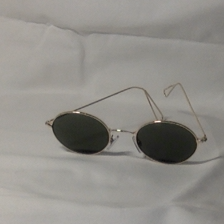

In [14]:
pic_location="/content/drive/MyDrive/images2/sunglasses/21-55-02-198741.png"
img =keras.preprocessing.image.load_img(pic_location)
img

In [15]:
img.size

(224, 224)

In [16]:
# turn the image into a 3D array (hight, width, color_channels)
numpy_image = np.array(img)
numpy_image.shape

(224, 224, 3)

In [17]:
# add an extra dimention (n_samples,hight, width, color_channels)
image_batch = np.expand_dims(numpy_image, axis=0) # or np.reshape(numpy_image, (1,224,224,3))
image_batch.shape

(1, 224, 224, 3)

In [18]:
# pre-process the input image 
processed_image = keras.applications.vgg16.preprocess_input(image_batch)

In [19]:
# Predict
prediction = vgg_model.predict(processed_image)
label_vgg = keras.applications.imagenet_utils.decode_predictions(prediction)
label_vgg

1/1 [==============================] - 2s 2s/step


[[('n02219486', 'ant', 0.15474488),
  ('n04356056', 'sunglasses', 0.058307365),
  ('n01770081', 'harvestman', 0.054842703),
  ('n01776313', 'tick', 0.047108207),
  ('n03814906', 'necklace', 0.045351867)]]

### Pretrained model for predicting random images

In [20]:
base_path = "/content/drive/MyDrive/images3/"
files = []
for file in os.listdir(path=base_path):
    if file != ".DS_Store":
        files.append(file)
files

['21-55-02-720843.png',
 '21-57-03-668019.png',
 '22-07-14-711035.png',
 '22-10-40-547295.png',
 '22-10-40-678422.png',
 '22-04-41-328421.png']

1/1 [==============================] - 1s 592ms/step


'/content/drive/MyDrive/images3/22-04-41-328421.png'

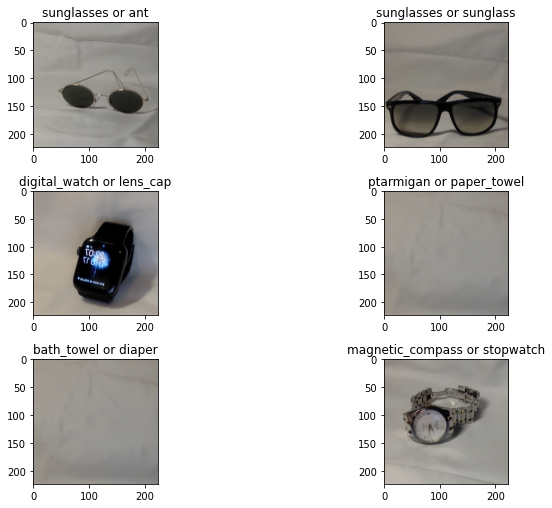

In [21]:
def batch_prediction(files = files):

    for i in range(len(files)):
        
        """read and preprocess"""
        my_path = f"{base_path}{files[i]}"
        pic = keras.preprocessing.image.load_img(my_path,target_size=(224,224)) #load image
        numpy_image = np.array(pic) # from image to numpy array
        image_batch = np.expand_dims(numpy_image, axis=0) #add 1 dimention
        processed_image = keras.applications.vgg16.preprocess_input(image_batch) #preprocess image
        
        """predict"""
        predictions = vgg_model.predict(processed_image) # prediction
        label_vgg = keras.applications.imagenet_utils.decode_predictions(
    predictions) #extract label

        """plot"""
        plt.subplot(15,2,i+1);
        plt.tight_layout()
        plt.imshow(pic)
        plt.title(f"""{label_vgg[0][0][1]} or {label_vgg[0][1][1]}""" )
    return my_path
    

batch_prediction()

In [22]:
# How to check for VGG16 (whole network) input
vgg_model.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [23]:
#Select one layer
layer_name = vgg_model.layers[11]._name

In [24]:
layer_name

'block4_conv1'

In [25]:
# Input of a specific layer
vgg_model.get_layer(layer_name).input

<KerasTensor: shape=(None, 28, 28, 256) dtype=float32 (created by layer 'block3_pool')>

In [26]:
# Output of a specific layer
layer_output = vgg_model.get_layer(layer_name).output
layer_output

<KerasTensor: shape=(None, 28, 28, 512) dtype=float32 (created by layer 'block4_conv1')>

In [27]:
# Redefine model to output right after the first layer
intermediate_layer_model = keras.models.Model(inputs=vgg_model.input,
                                 outputs=layer_output)
intermediate_layer_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [28]:
# Feature map
feature_map = intermediate_layer_model.predict(processed_image)
feature_map.shape

1/1 [==============================] - 0s 487ms/step


(1, 28, 28, 512)

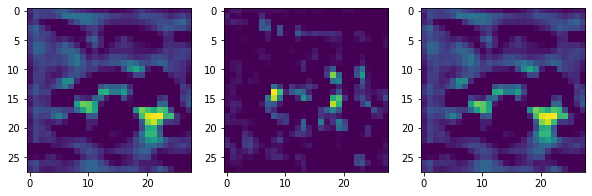

In [29]:
#  visualize a few feature maps
plt.subplot(1, 3, 1)
plt.imshow(feature_map[0,:, :, 0])

plt.subplot(1, 3, 2)
plt.imshow(feature_map[0,:, :, 1])

plt.subplot(1, 3, 3)
plt.imshow(feature_map[0,:, :, 0]);

### TransferLearn

In [30]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [31]:
for layers in base_model.layers[:]: 
    layers.trainable = False

In [32]:
# Let's explore the data folder
base_path = '/content/drive/MyDrive/images2/'

# Let's define the classes
classes = os.listdir(base_path)


In [33]:
classes

['sunglasses', 'empty', 'watch']

In [34]:
classes=classes

In [35]:
def load_image(base_path):
    """it loads all the image into X and the classes in y """
    X_list = []
    y_list = []
    classes = os.listdir(base_path)
    classes=classes
    for class_ in classes:
        files = os.listdir(base_path+class_)
        #print(files)
        for file in files:
            if file != ".DS_Store":
                pic = keras.preprocessing.image.load_img(path=base_path+class_+'/'+f'{file}',target_size=(224,224))
                numpy_image = np.array(pic)
                processed_image = preprocess_input(numpy_image)
                X_list.append(processed_image)
                y_list.append(class_)
        
    X = np.array(X_list)
    y = np.array(y_list)
    
    return X, y, classes

In [36]:
X,y,classes= load_image(base_path)

In [37]:
X.shape

(342, 224, 224, 3)

In [38]:
y

array(['sunglasses', 'sunglasses', 'sunglasses', 'sunglasses',
       'sunglasses', 'sunglasses', 'sunglasses', 'sunglasses',
       'sunglasses', 'sunglasses', 'sunglasses', 'sunglasses',
       'sunglasses', 'sunglasses', 'sunglasses', 'sunglasses',
       'sunglasses', 'sunglasses', 'sunglasses', 'sunglasses',
       'sunglasses', 'sunglasses', 'sunglasses', 'sunglasses',
       'sunglasses', 'sunglasses', 'sunglasses', 'sunglasses',
       'sunglasses', 'sunglasses', 'sunglasses', 'sunglasses',
       'sunglasses', 'sunglasses', 'sunglasses', 'sunglasses',
       'sunglasses', 'sunglasses', 'sunglasses', 'sunglasses',
       'sunglasses', 'sunglasses', 'sunglasses', 'sunglasses',
       'sunglasses', 'sunglasses', 'sunglasses', 'sunglasses',
       'sunglasses', 'sunglasses', 'sunglasses', 'sunglasses',
       'sunglasses', 'sunglasses', 'sunglasses', 'sunglasses',
       'sunglasses', 'sunglasses', 'sunglasses', 'sunglasses',
       'sunglasses', 'sunglasses', 'sunglasses', 'sungl

In [39]:
# y to categorical
y = pd.Series(y).map({classes[0]:0, classes[1]:1, classes[2]:2})

In [40]:
y

0      0
1      0
2      0
3      0
4      0
      ..
337    2
338    2
339    2
340    2
341    2
Length: 342, dtype: int64

**Calculate feature vector for all images
use `base_model.predict(X)`**

In [41]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [42]:
out_features_vector = base_model.predict(X)
out_features_vector.shape

11/11 [==============================] - 187s 17s/step


(342, 7, 7, 512)

In [43]:
X.shape

(342, 224, 224, 3)

In [44]:
X_reshaped = out_features_vector.reshape((342,7*7*512))
X_reshaped.shape

(342, 25088)

####  Train Test split

In [45]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [46]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X_reshaped, 
                                             y.values, 
                                             test_size=0.25,
                                             random_state=42)

In [47]:
log_reg = LogisticRegression()
log_reg.fit(Xtrain,ytrain)

LogisticRegression()

In [48]:
ypred_train=log_reg.predict(Xtrain)
ypred_test = log_reg.predict(Xtest)

In [49]:
ypred_train

array([0, 2, 1, 1, 2, 2, 2, 2, 1, 1, 0, 1, 0, 1, 0, 1, 2, 0, 2, 2, 1, 2,
       2, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2, 0, 1, 0, 2, 2, 0, 1, 2,
       1, 1, 1, 1, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 1, 0, 2, 2, 1, 1, 1,
       0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 2, 2, 1, 0, 2, 0, 0, 2, 0, 1, 1,
       1, 1, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1, 1, 2, 1, 2, 0, 0, 2,
       1, 1, 1, 0, 0, 2, 1, 1, 0, 2, 1, 2, 0, 0, 2, 2, 2, 0, 1, 1, 2, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 2, 0, 0, 2, 0, 2, 1, 2, 0, 2, 2, 1, 2, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1,
       0, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1,
       2, 2, 0, 0, 1, 1, 2, 1, 1, 0, 0, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 1,
       1, 1, 0, 0, 2, 1, 1, 2, 0, 1, 0, 0, 2, 0])

In [50]:
# validation
scores_train = cross_val_score(log_reg,Xtrain,ytrain,cv=10)
scores_train

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [51]:
print(f"accuracy score on train: {accuracy_score(ytrain,ypred_train)}")
print(f"accuracy score on test: {accuracy_score(ytest,ypred_test)}")

accuracy score on train: 1.0
accuracy score on test: 1.0


### Base Model + Customized Dense Layers for Classification

In [53]:
from tensorflow.keras import backend as K

In [92]:
K.clear_session()

new_model = keras.models.Sequential([vgg_model, 
                                      keras.layers.Flatten(),
                                      keras.layers.Dense(3, activation='softmax')])
new_model = keras.models.Sequential([
    
    # Base model
    base_model,
    
    # Flatten layer
    keras.layers.Flatten(),
    
    #keras.layers.Dropout(.5),
    # fc1 fully connected layer
    keras.layers.Dense(units=30, activation=keras.activations.relu, name='fc1'),
    
    # fc2 fully connected layer
    keras.layers.Dense(units=15, activation=keras.activations.relu, name='fc2'),
    
    # output layer
    keras.layers.Dense(units=1, activation=keras.activations.sigmoid, name='otput')

])

In [93]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 fc1 (Dense)                 (None, 30)                752670    
                                                                 
 fc2 (Dense)                 (None, 15)                465       
                                                                 
 otput (Dense)               (None, 1)                 16        
                                                                 
Total params: 15,467,839
Trainable params: 7,832,575
Non-trainable params: 7,635,264
_________________________________________________________________


In [94]:
new_model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adam(learning_rate=0.0001),
                 )

In [95]:
X.shape, y.shape

((342, 224, 224, 3), (342,))

In [96]:
X_train = np.asarray(X)
y_train = np.asarray(y)

In [97]:
history = new_model.fit(X_train,y_train,batch_size=20, epochs=5)

Epoch 1/5
18/18 [==============================] - 222s 12s/step - loss: 0.0000e+00
Epoch 2/5
18/18 [==============================] - 218s 12s/step - loss: 0.0000e+00
Epoch 3/5
18/18 [==============================] - 219s 12s/step - loss: 0.0000e+00
Epoch 4/5
18/18 [==============================] - 219s 12s/step - loss: 0.0000e+00
Epoch 5/5
18/18 [==============================] - 219s 12s/step - loss: 0.0000e+00


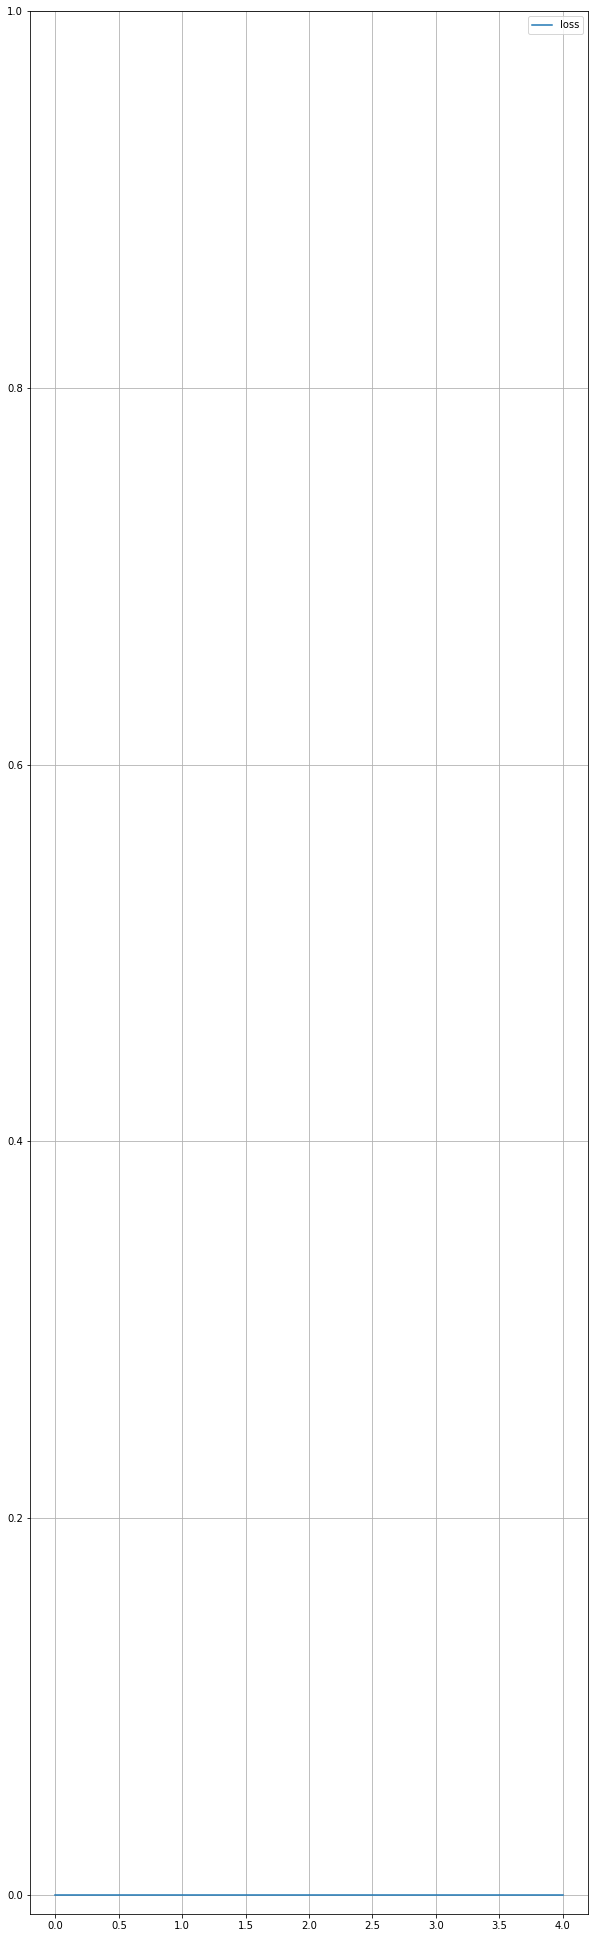

In [98]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(-0.01,1)
plt.savefig('conv_frozen_new_fcl.png')

In [99]:
new_model.save('new_denselayers.h5')

### Fine tuning

In [100]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [101]:
#to unfreeze some layers
unfreeze_layers = 5
for layers in base_model.layers[-unfreeze_layers:]: # --> last 5 layers trainable
    layers.trainable = True

In [102]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [103]:
K.clear_session()
new_model = keras.models.Sequential([
    
    # Base model
    base_model,
    
    # Flatten layer
    keras.layers.Flatten(),
    
    #keras.layers.Dropout(.5),
    # fc1 fully connected layer
    keras.layers.Dense(units=30, activation=keras.activations.relu, name='fc1'),
    
    # fc2 fully connected layer
    keras.layers.Dense(units=15, activation=keras.activations.relu, name='fc2'),
    
    # output layer
    keras.layers.Dense(units=1, activation=keras.activations.sigmoid, name='otput')

])

In [104]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 fc1 (Dense)                 (None, 30)                752670    
                                                                 
 fc2 (Dense)                 (None, 15)                465       
                                                                 
 otput (Dense)               (None, 1)                 16        
                                                                 
Total params: 15,467,839
Trainable params: 7,832,575
Non-trainable params: 7,635,264
_________________________________________________________________


In [105]:
new_model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adam(learning_rate=0.001),
                 )

In [106]:
history = new_model.fit(X_train,y_train,batch_size=10, epochs=5)

Epoch 1/5
35/35 [==============================] - 222s 6s/step - loss: 0.0000e+00
Epoch 2/5
35/35 [==============================] - 221s 6s/step - loss: 0.0000e+00
Epoch 3/5
35/35 [==============================] - 221s 6s/step - loss: 0.0000e+00
Epoch 4/5
35/35 [==============================] - 222s 6s/step - loss: 0.0000e+00
Epoch 5/5
35/35 [==============================] - 221s 6s/step - loss: 0.0000e+00


(0.0, 1.0)

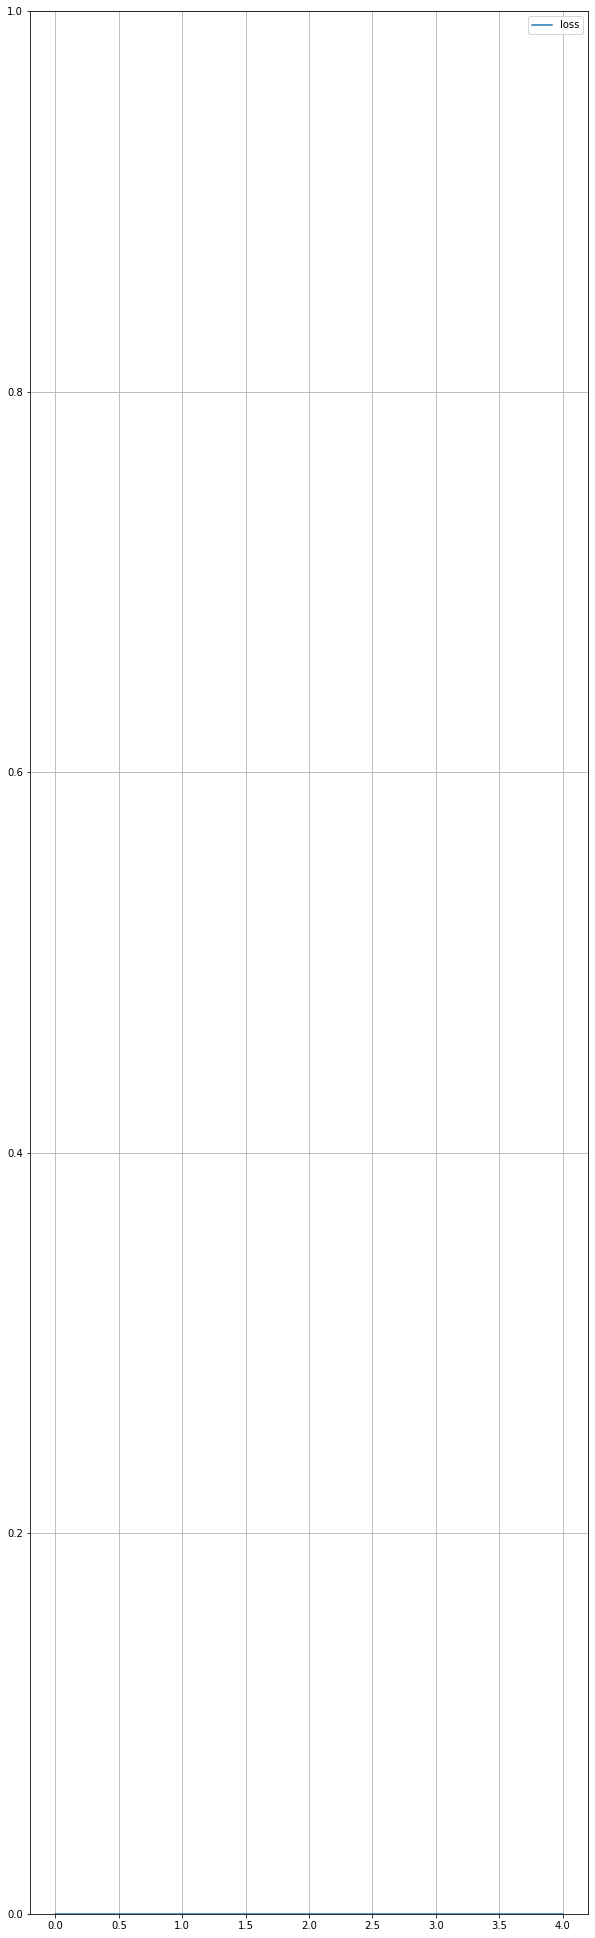

In [107]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,1)